Text(0, 0.5, 'Date')

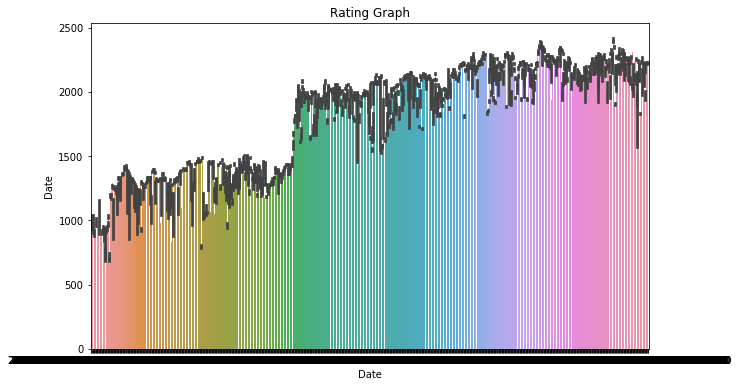

In [133]:
plt.figure(figsize=(10,6))
plt.title("Rating Graph")
sns.barplot(x=chess_data.index, y=chess_data['Player Rating'])
plt.ylabel("Date")

In [387]:
chess_data['Player Result'].unique()

array(['Resigned', 'Checkmated', 'Draw agreed', 'Win', 'Timeout',
       'Abandoned', 'Stalemate', 'Draw by repetition',
       'Insufficient material', 'Draw by 50-move rule',
       'Opponent King reached the hill', 'Checked for the 3rd time',
       'Draw by timeout vs insufficient material'], dtype=object)

In [455]:
total_games = chess_data.shape[0]
num_wins = chess_data[chess_data['Player Result'] == 'Win'].shape[0]
num_losses = chess_data[chess_data['Opponent Result'] == 'Win'].shape[0]
draws = chess_data[chess_data['Player Result'].str.contains('Draw')].shape[0]
insufficient_material = chess_data[chess_data['Player Result'] == 'Insufficient material'].shape[0]
stalemates = chess_data[chess_data['Player Result'] == 'Stalemate'].shape[0]
num_draws = draws + insufficient_material + stalemates
frequency_data_dict = {'total_games': total_games, 'num_wins': num_wins, 'num_losses': num_losses, 'num_draws': num_draws}
frequency_data_df = pd.DataFrame.from_records([frequency_data_dict], index='total_games')
frequency_data_df

,num_wins,num_losses,num_draws
total_games,,,
15919,7218,8061,640


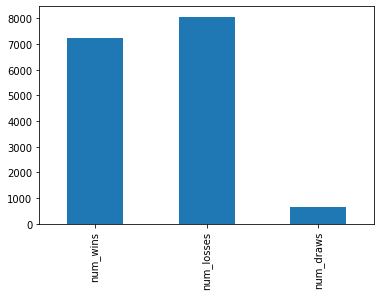

In [389]:
frequency_data_df.iloc[0].plot.bar()

In [438]:
chess_data['Time Control'].unique()

array(['rapid', 'blitz', 'daily', 'bullet'], dtype=object)

In [439]:
chess_data['Tournament'].unique()

array(['None',
       'https://www.chess.com/tournament/live/30-super-blitz-332284',
       'https://www.chess.com/tournament/live/100-rapid-336496',
       'https://www.chess.com/tournament/live/30-super-blitz-598930',
       'https://www.chess.com/tournament/live/50-blitz-599018',
       'https://www.chess.com/tournament/live/10-lightning-612666',
       'https://www.chess.com/tournament/live/30-super-blitz-612678',
       'https://www.chess.com/tournament/live/10-lightning-623006',
       'https://www.chess.com/tournament/live/10-bullet-688004',
       'https://www.chess.com/tournament/live/10-bullet-690295',
       'https://www.chess.com/tournament/live/21-bullet-690303',
       'https://www.chess.com/tournament/live/21-bullet-691348',
       'https://www.chess.com/tournament/live/10-king-of-the-hill-694369',
       'https://www.chess.com/tournament/live/100-blitz-694372',
       'https://www.chess.com/tournament/live/21-bullet-737897',
       'https://www.chess.com/tournament/live

In [440]:
chess_data['Opening'].unique()

array(['https://www.chess.com/openings/Philidor-Defense-3.Bc4',
       'https://www.chess.com/openings/Sicilian-Defense-Open-Variation',
       'https://www.chess.com/openings/Italian-Game-Anti-Fried-Liver-Defense',
       ...,
       'https://www.chess.com/openings/French-Defense-Classical-Variation',
       'https://www.chess.com/openings/Sicilian-Defense-Open-Najdorf-Main-Line-10.Bd3-h6',
       'https://www.chess.com/openings/Slav-Defense-Modern-Line-3...Nf6-4.g3-Bf5-5.Bg2'],
      dtype=object)

In [441]:
chess_data.head()

,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Opponent First Move,Opening,Variation,Termination,Moves,Tournament,Event,Time Class,Time Control,FEN
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-24,Dontmesswithme_2,1048,United States of America,White,Resigned,e4,badar1945,1240,Pakistan,Black,...,e5,https://www.chess.com/openings/Philidor-Defens...,Defense 3.Bc4,badar1945 won by resignation,48.0,None,Live Chess,1800,rapid,3kr3/5r2/1b6/4q3/6P1/3P1P2/6KP/8 w - -
2013-07-24,Dontmesswithme_2,883,United States of America,Black,Checkmated,c5,mikeofri101107,939,United States of America,White,...,e4,https://www.chess.com/openings/Sicilian-Defens...,Defense Open Variation,mikeofri101107 won by checkmate,54.0,None,Live Chess,1800,rapid,4k1Q1/R6P/8/8/8/2B5/6K1/8 b - -
2013-07-24,Dontmesswithme_2,1042,United States of America,White,Resigned,e4,deschuter,1221,United States of America,Black,...,e5,https://www.chess.com/openings/Italian-Game-An...,Game Anti Fried Liver Defense,deschuter won by resignation,12.0,None,Live Chess,600,blitz,r1bqkbr1/pppp1p2/5n1p/4p3/2B1P3/8/PPnP1PPP/RNB...
2013-07-24,Dontmesswithme_2,1014,United States of America,Black,Draw agreed,e5,chuchodomz,944,Mexico,White,...,d4,https://www.chess.com/openings/Englund-Gambit,Gambit,Game drawn by agreement,14.0,None,Live Chess,600,blitz,r1b2r2/p1ppqpkp/1p3npb/P7/3P4/1NPBPN2/P3QPPP/R...
2013-07-24,Dontmesswithme_2,981,United States of America,Black,Win,c5,Saladin_wise,840,Ukraine,White,...,e4,https://www.chess.com/openings/Sicilian-Defens...,Defense Smith Morra Gambit 2...cxd4 3.Qxd4 Nc6,Dontmesswithme_2 won by checkmate,38.0,None,Live Chess,1800,rapid,3k2nr/1p4pp/3P1p2/8/8/p7/2r5/1q2K3 w - -


In [456]:
chess_data['Rating Difference'] = chess_data['Opponent Rating'] - chess_data['Player Rating']
chess_data['Player Result'].unique()

array(['Resigned', 'Checkmated', 'Draw agreed', 'Win', 'Timeout',
       'Abandoned', 'Stalemate', 'Draw by repetition',
       'Insufficient material', 'Draw by 50-move rule',
       'Opponent King reached the hill', 'Checked for the 3rd time',
       'Draw by timeout vs insufficient material'], dtype=object)

In [457]:
chess_data['Rating Difference']

Date
2013-07-24    192
2013-07-24     56
2013-07-24    179
2013-07-24    -70
2013-07-24   -141
             ... 
2020-07-12   -214
2020-07-12   -216
2020-07-12    959
2020-07-12     27
2020-07-12   -279
Name: Rating Difference, Length: 15919, dtype: int64

15901

array([  65,  681, 1114, ...,  243,   45,  966], dtype=int64)

In [458]:
chess_data['Player Result']

Date
2013-07-24       Resigned
2013-07-24     Checkmated
2013-07-24       Resigned
2013-07-24    Draw agreed
2013-07-24            Win
                 ...     
2020-07-12            Win
2020-07-12            Win
2020-07-12       Resigned
2020-07-12            Win
2020-07-12            Win
Name: Player Result, Length: 15919, dtype: object

In [459]:
from sklearn import preprocessing

In [460]:
label_enc = preprocessing.LabelEncoder()
termination = label_enc.fit_transform(list(chess_data['Player Result']))
opening_var = label_enc.fit_transform(list(chess_data['Variation']))

In [461]:
def unique(list1): 
    unique_list = []  
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list


In [462]:
def format_time(num):
    if num.find('+') != -1:
        list = num.split('+')
        numA = float(list[0])
        numB = float(list[1])
        return numA + numB
    elif num.find('/') != -1:
        list = num.split('/')
        num = float(list[1])
        return num
    return float(num)
chess_data['Time Class'] = chess_data['Time Class'].apply(lambda l: format_time(l))
chess_data['Time Class'].astype(float)

Date
2013-07-24    1800.0
2013-07-24    1800.0
2013-07-24     600.0
2013-07-24     600.0
2013-07-24    1800.0
               ...  
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
Name: Time Class, Length: 15919, dtype: float64

In [422]:
chess_data['Time Class']

Date
2013-07-24    1800.0
2013-07-24    1800.0
2013-07-24     600.0
2013-07-24     600.0
2013-07-24    1800.0
               ...  
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
Name: Time Class, Length: 15919, dtype: float64

In [463]:
chess_data['Result_Of_Game'] = termination
chess_data['Opening_Variation_Name'] = opening_var
chess_data = chess_data.loc[chess_data['Time Control'] != 'daily']

In [464]:
chess_data['Time Class'].astype(float)

Date
2013-07-24    1800.0
2013-07-24    1800.0
2013-07-24     600.0
2013-07-24     600.0
2013-07-24    1800.0
               ...  
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
Name: Time Class, Length: 15901, dtype: float64

In [450]:
termination.astype(float)
opening_var.astype(float)
X = ['Player Rating', 'Opponent Rating', 'Rating Difference', 'Moves', 'Time Class', 'Opening_Variation_Name']

array([  65.,  682., 1115., ...,  244.,   45.,  967.])

In [465]:
chess_data

,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Termination,Moves,Tournament,Event,Time Class,Time Control,FEN,Rating Difference,Result_Of_Game,Opening_Variation_Name
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-24,Dontmesswithme_2,1048,United States of America,White,Resigned,e4,badar1945,1240,Pakistan,Black,...,badar1945 won by resignation,48.0,None,Live Chess,1800.0,rapid,3kr3/5r2/1b6/4q3/6P1/3P1P2/6KP/8 w - -,192,9,65
2013-07-24,Dontmesswithme_2,883,United States of America,Black,Checkmated,c5,mikeofri101107,939,United States of America,White,...,mikeofri101107 won by checkmate,54.0,None,Live Chess,1800.0,rapid,4k1Q1/R6P/8/8/8/2B5/6K1/8 b - -,56,2,682
2013-07-24,Dontmesswithme_2,1042,United States of America,White,Resigned,e4,deschuter,1221,United States of America,Black,...,deschuter won by resignation,12.0,None,Live Chess,600.0,blitz,r1bqkbr1/pppp1p2/5n1p/4p3/2B1P3/8/PPnP1PPP/RNB...,179,9,1115
2013-07-24,Dontmesswithme_2,1014,United States of America,Black,Draw agreed,e5,chuchodomz,944,Mexico,White,...,Game drawn by agreement,14.0,None,Live Chess,600.0,blitz,r1b2r2/p1ppqpkp/1p3npb/P7/3P4/1NPBPN2/P3QPPP/R...,-70,3,912
2013-07-24,Dontmesswithme_2,981,United States of America,Black,Win,c5,Saladin_wise,840,Ukraine,White,...,Dontmesswithme_2 won by checkmate,38.0,None,Live Chess,1800.0,rapid,3k2nr/1p4pp/3P1p2/8/8/p7/2r5/1q2K3 w - -,-141,12,738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-12,Dontmesswithme_2,2223,United States of America,White,Win,d4,paulw7-uk,2009,United Kingdom of Great Britain and Northern I...,Black,...,Dontmesswithme_2 won by resignation,35.0,None,Live Chess,180.0,blitz,8/p7/1p3k1p/8/P4KP1/7P/1P6/8 b - -,-214,12,967
2020-07-12,Dontmesswithme_2,2227,United States of America,Black,Win,c5,Zacer,2011,United States of America,White,...,Dontmesswithme_2 won on time,35.0,None,Live Chess,180.0,blitz,k2r2r1/8/4p3/4qpp1/b3p3/2P1B2P/P1P3P1/2K5 w - -,-216,12,640
2020-07-12,Dontmesswithme_2,2227,United States of America,Black,Resigned,c5,Hikaru,3186,United States of America,White,...,Hikaru won by resignation,34.0,None,Live Chess,180.0,blitz,r3r1k1/5p1N/4pPpQ/3p1b1p/p2P4/7P/pq3PP1/R3R1K1...,959,9,244


,Variation
Date,
2013-07-24,6
2013-07-24,4
2013-07-24,2
2013-07-24,32
2013-07-24,11
...,...
2020-07-12,84
2020-07-12,2
2020-07-12,64


15901

Date
2013-07-24                                        Defense 3.Bc4
2013-07-24                               Defense Open Variation
2013-07-24                        Game Anti Fried Liver Defense
2013-07-24                                               Gambit
2013-07-24       Defense Smith Morra Gambit 2...cxd4 3.Qxd4 Nc6
                                    ...                        
2020-07-12                            Gambit Declined 3.Nf3 Nf6
2020-07-12    Defense Open Najdorf Variation 6.Bg5 e6 7.f4 N...
2020-07-12             Defense Delayed Alapin Variation 3...Nf6
2020-07-12                                     Defense 2.Nf3 d6
2020-07-12                            Gambit Declined 3.Nf3 Nf6
Name: Opening_Variation, Length: 15901, dtype: object

,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Termination,Moves,Tournament,Event,Time Class,Time Control,FEN,Rating Difference,opening_name,Opening_Variation
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-24,Dontmesswithme_2,1048,United States of America,White,Resigned,e4,badar1945,1240,Pakistan,Black,...,-1,48.0,None,Live Chess,1800.0,rapid,3kr3/5r2/1b6/4q3/6P1/3P1P2/6KP/8 w - -,192,65,Defense 3.Bc4
2013-07-24,Dontmesswithme_2,883,United States of America,Black,Checkmated,c5,mikeofri101107,939,United States of America,White,...,-1,54.0,None,Live Chess,1800.0,rapid,4k1Q1/R6P/8/8/8/2B5/6K1/8 b - -,56,681,Defense Open Variation
2013-07-24,Dontmesswithme_2,1042,United States of America,White,Resigned,e4,deschuter,1221,United States of America,Black,...,-1,12.0,None,Live Chess,600.0,blitz,r1bqkbr1/pppp1p2/5n1p/4p3/2B1P3/8/PPnP1PPP/RNB...,179,1114,Game Anti Fried Liver Defense
2013-07-24,Dontmesswithme_2,1014,United States of America,Black,Draw agreed,e5,chuchodomz,944,Mexico,White,...,0,14.0,None,Live Chess,600.0,blitz,r1b2r2/p1ppqpkp/1p3npb/P7/3P4/1NPBPN2/P3QPPP/R...,-70,911,Gambit
2013-07-24,Dontmesswithme_2,981,United States of America,Black,Win,c5,Saladin_wise,840,Ukraine,White,...,1,38.0,None,Live Chess,1800.0,rapid,3k2nr/1p4pp/3P1p2/8/8/p7/2r5/1q2K3 w - -,-141,737,Defense Smith Morra Gambit 2...cxd4 3.Qxd4 Nc6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-12,Dontmesswithme_2,2223,United States of America,White,Win,d4,paulw7-uk,2009,United Kingdom of Great Britain and Northern I...,Black,...,1,35.0,None,Live Chess,180.0,blitz,8/p7/1p3k1p/8/P4KP1/7P/1P6/8 b - -,-214,966,Gambit Declined 3.Nf3 Nf6
2020-07-12,Dontmesswithme_2,2227,United States of America,Black,Win,c5,Zacer,2011,United States of America,White,...,1,35.0,None,Live Chess,180.0,blitz,k2r2r1/8/4p3/4qpp1/b3p3/2P1B2P/P1P3P1/2K5 w - -,-216,639,Defense Open Najdorf Variation 6.Bg5 e6 7.f4 N...
2020-07-12,Dontmesswithme_2,2227,United States of America,Black,Resigned,c5,Hikaru,3186,United States of America,White,...,-1,34.0,None,Live Chess,180.0,blitz,r3r1k1/5p1N/4pPpQ/3p1b1p/p2P4/7P/pq3PP1/R3R1K1...,959,243,Defense Delayed Alapin Variation 3...Nf6


In [237]:
chess_data.columns

Index(['Player', 'Player Rating', 'Player Nationality', 'Player Side',
       'Player Result', 'Player First Move', 'Opponent', 'Opponent Rating',
       'Opponent Nationality', 'Opponent Side', 'Opponent Result',
       'Opponent First Move', 'Opening', 'Variation', 'Termination', 'Moves',
       'Tournament', 'Event', 'Time Class', 'Time Control', 'FEN',
       'Rating Difference', 'opening_name', 'Opening_Variation'],
      dtype='object')

In [246]:
chess_data['Time Class'].astype(float)

Date
2013-07-24    1800.0
2013-07-24    1800.0
2013-07-24     600.0
2013-07-24     600.0
2013-07-24    1800.0
               ...  
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
2020-07-12     180.0
Name: Time Class, Length: 15901, dtype: float64

In [256]:
tournament_data = chess_data.loc[chess_data['Tournament'] != 'None']

In [266]:
tournament_data = tournament_data.loc[tournament_data.index.year >= 2018]

In [275]:
chess_data = chess_data.loc[chess_data.index.year >= 2018]

In [282]:
chess_data.head(600)
def get_color(color):
    if color == 'White':
        return 2
    else:
        return 1
chess_data['Color'] = chess_data['Player Side'].apply(lambda l: get_color(l))

In [378]:
chess_data = chess_data.loc[chess_data['Player Rating'] > 1800]
chess_data

,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Moves,Tournament,Event,Time Class,Time Control,FEN,Rating Difference,opening_name,Opening_Variation,Color
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-16,Dontmesswithme_2,1806,United States of America,White,Win,d4,Tau6283,1795,United States of America,Black,...,26.0,None,Live Chess,180.0,blitz,4r1k1/p1p1q1pQ/1p2Pr2/n5N1/8/7P/P5PB/1R2b2K b - -,-11,1782,Pawn Opening Accelerated London System,2
2018-07-16,Dontmesswithme_2,1814,United States of America,White,Win,d4,CloudTactician,1795,United States of America,Black,...,18.0,None,Live Chess,180.0,blitz,1rb1qrk1/1p3pQn/p2p1n1p/2pPpN2/2P1P3/2N2P2/PP2...,-19,33,Benoni Defense Semi Benoni Variation Blockade ...,2
2018-07-16,Dontmesswithme_2,1806,United States of America,Black,Resigned,Nf6,vadimreimche,1808,Germany,White,...,47.0,None,Live Chess,180.0,blitz,8/8/2Qbk3/2B1p3/1PK1Pp2/1N3Pp1/6P1/8 b - -,2,1380,Indian Defense Orthodox Exchange Variation 8.Q...,1
2018-07-16,Dontmesswithme_2,1815,United States of America,White,Win,d4,tranquilo170,1833,Peru,Black,...,7.0,None,Live Chess,180.0,blitz,rn2kb1r/pp2pppp/1q3n2/3p1Q2/2pP1B2/2P1P3/PP3PP...,18,1782,Pawn Opening Accelerated London System,2
2018-07-16,Dontmesswithme_2,1822,United States of America,Black,Win,Nf6,aschenback,1763,Colombia,White,...,30.0,None,Live Chess,180.0,blitz,r5k1/P1r4p/3p1n2/Q1pP4/2P2b2/RN3p1q/5P2/5R1K w...,-59,1251,Indian Defense 3.Nf3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-12,Dontmesswithme_2,2223,United States of America,White,Win,d4,paulw7-uk,2009,United Kingdom of Great Britain and Northern I...,Black,...,35.0,None,Live Chess,180.0,blitz,8/p7/1p3k1p/8/P4KP1/7P/1P6/8 b - -,-214,966,Gambit Declined 3.Nf3 Nf6,2
2020-07-12,Dontmesswithme_2,2227,United States of America,Black,Win,c5,Zacer,2011,United States of America,White,...,35.0,None,Live Chess,180.0,blitz,k2r2r1/8/4p3/4qpp1/b3p3/2P1B2P/P1P3P1/2K5 w - -,-216,639,Defense Open Najdorf Variation 6.Bg5 e6 7.f4 N...,1
2020-07-12,Dontmesswithme_2,2227,United States of America,Black,Resigned,c5,Hikaru,3186,United States of America,White,...,34.0,None,Live Chess,180.0,blitz,r3r1k1/5p1N/4pPpQ/3p1b1p/p2P4/7P/pq3PP1/R3R1K1...,959,243,Defense Delayed Alapin Variation 3...Nf6,1


In [371]:
features = ['Player Rating', 'Opponent Rating', 'Time Class', 'Rating Difference', 'Color', 'opening_name', 'Moves']
pred = ['Termination']

In [ ]:
X = chess_data[features]
y = chess_data['Termination']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)
model = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
model